<a href="https://colab.research.google.com/github/kitigai/LearnDL/blob/master/DeepNNBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0-rc3


In [21]:
#load data sample
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images.shape

(60000, 28, 28)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


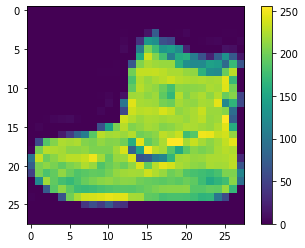

In [23]:
#plot sample image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
#shift image values between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

In [0]:
#build model that has 1 hidden layer with 128 nodes and has 10 classes output
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
#train model
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4948 - accuracy: 0.8249
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3736 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3366 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3142 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2971 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2797 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2684 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2592 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2504 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

In [27]:
# accuracy test
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3328 - accuracy: 0.8829

Test accuracy: 0.8828999996185303


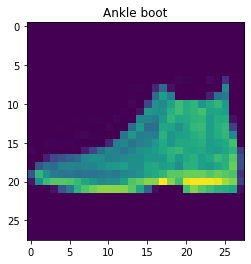

In [34]:
# make predict
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
title = class_names[np.argmax(predictions[0])]
plt.figure()
plt.title(title)
plt.imshow(test_images[0])
plt.show()